In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Metadata

In [2]:
metadata = pd.read_csv("../F3/All_info.csv")
metadata = metadata[["Assembly accession","Genus","Family", "scaf_bp", "Completeness", "MAG","Origin"]]
metadata.tail(2)

,Assembly accession,Genus,Family,scaf_bp,Completeness,MAG,Origin
2678,GCA_903819445.1,Flavobacterium,Flavobacteriaceae,5508144,99.65,False,Unclassified
2679,GCA_903969135.1,Chryseobacterium,Weeksellaceae,5227721,100.00,False,Non_marine


In [3]:
metadata.groupby("Genus").count().sort_values("Origin")

,Assembly accession,Family,scaf_bp,Completeness,MAG,Origin
Genus,,,,,,
Sediminicola,1,1,1,1,1,1
Kriegella,1,1,1,1,1,1
CCMM003,1,1,1,1,1,1
Ulvibacter_A,1,1,1,1,1,1
UM-FILTER-40-17,1,1,1,1,1,1
...,...,...,...,...,...,...
Tenacibaculum,68,68,68,68,68,68
Capnocytophaga,75,75,75,75,75,75
Elizabethkingia,193,193,193,193,193,193


In [4]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics.head()

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192


## Merops annotation

In [5]:
merops = pd.read_csv("merops_counts.csv")
merops = merops.rename(columns={"Unnamed: 0":"ID"}).set_index("ID").T
merops["Merops orfs total"] = merops.sum(axis=1)
merops = merops.reset_index()
merops = merops[["index", "Merops orfs total"]]
merops.tail()

ID,index,Merops orfs total
2676,GCA_009830375.1,131
2677,GCA_014220405.1,194
2678,GCA_014220185.1,193
2679,GCA_004214315.1,72
2680,GCA_900610275.1,109


## Main table:

In [6]:
merge = pd.merge(statistics, merops, how="left", left_on="Unnamed: 0", right_on="index")
merge["Orfs_anno_merops%"] = merge["Merops orfs total"]/merge["orfs"]*100
merge =pd.merge(merge,metadata, how="left", left_on="Unnamed: 0", right_on="Assembly accession")

merge["merops"] = merge["Merops orfs total"]
merge["cazymes"] = merge["cazymes"]
merge["PEP:GH"] = merge["Merops orfs total"]/merge["cazymes"]

merge["merops_permb"] = merge["Merops orfs total"]/merge["scaf_bp"]*1000000
merge["cazymes_permb"] = merge["cazymes"]/merge["scaf_bp"]*1000000

merge["P2"] = merge["merops"]/(merge["cazymes"]+merge["merops"])*2

merge=merge.fillna(0)
merge.tail()

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,index,Merops orfs total,Orfs_anno_merops%,Assembly accession,Genus,Family,scaf_bp,Completeness,MAG,Origin,merops,PEP:GH,merops_permb,cazymes_permb,P2
2676,GCA_000744835.1,3236,5914,1415,2231,123,43.726823,68.943140,3.800989,GCA_000744835.1,122,3.770087,GCA_000744835.1,Flavobacterium,Flavobacteriaceae,3790620.0,99.65,False,Marine,122,0.991870,32.184709,32.448518,0.995918
2677,GCA_000422365.1,2688,4856,1130,1787,70,42.038690,66.480655,2.604167,GCA_000422365.1,117,4.352679,GCA_000422365.1,Mesoflavibacter,Flavobacteriaceae,2966206.0,99.67,False,Marine,117,1.671429,39.444327,23.599170,1.251337
2678,GCA_000243235.1,3516,6027,1393,2326,105,39.618885,66.154721,2.986348,GCA_000243235.1,152,4.323094,GCA_000243235.1,Gillisia,Flavobacteriaceae,3966857.0,99.49,False,Non_marine,152,1.447619,38.317489,26.469318,1.182879
2679,GCA_006777945.1,2393,4131,997,1550,55,41.663184,64.772252,2.298370,GCA_006777945.1,105,4.387798,GCA_006777945.1,Flavobacterium,Flavobacteriaceae,2668540.0,99.29,False,Unclassified,105,1.909091,39.347358,20.610521,1.312500
2680,GCA_002909235.1,4633,7692,1724,2980,153,37.211310,64.321174,3.302396,GCA_002909235.1,150,3.237643,GCA_002909235.1,Arenibacter,Flavobacteriaceae,5453858.0,99.67,False,Marine,150,0.980392,27.503466,28.053536,0.990099


## Figure 7

In [7]:
df1 = merge.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean().reset_index().sort_values(by=["Family","Genus"]).set_index("Genus")
df1.head()

,Family,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Merops orfs total,Orfs_anno_merops%,scaf_bp,Completeness,merops,PEP:GH,merops_permb,cazymes_permb,P2
Genus,,,,,,,,,,,,,,,,,,
Aequorivita,Flavobacteriaceae,2958.714286,5003.000000,1139.166667,1827.642857,53.309524,38.569948,61.822365,1.796647,124.642857,4.210442,3.200450e+06,95.061429,124.642857,2.390956,38.918196,16.612573,1.404391
Algibacter,Flavobacteriaceae,4080.777778,6760.111111,1593.888889,2521.000000,178.888889,39.321717,62.255655,4.441777,134.888889,3.347715,4.651915e+06,98.622222,134.888889,0.761134,29.010905,38.375071,0.862163
Aquimarina,Flavobacteriaceae,4699.179487,7480.384615,1615.974359,2742.461538,109.076923,34.756690,58.658220,2.314977,216.974359,4.591500,5.446682e+06,97.797692,216.974359,2.146611,39.626937,19.937489,1.334296
Arenibacter,Flavobacteriaceae,4260.409091,7264.545455,1646.045455,2774.545455,145.636364,38.733654,65.150642,3.392553,151.136364,3.566963,5.102482e+06,98.362727,151.136364,1.078537,29.738942,28.245776,1.028436
BACL21,Flavobacteriaceae,2058.000000,3472.533333,863.933333,1340.400000,41.200000,42.815937,65.936525,2.010007,85.266667,4.213801,2.271539e+06,86.130667,85.266667,2.110636,37.902079,18.103018,1.354500


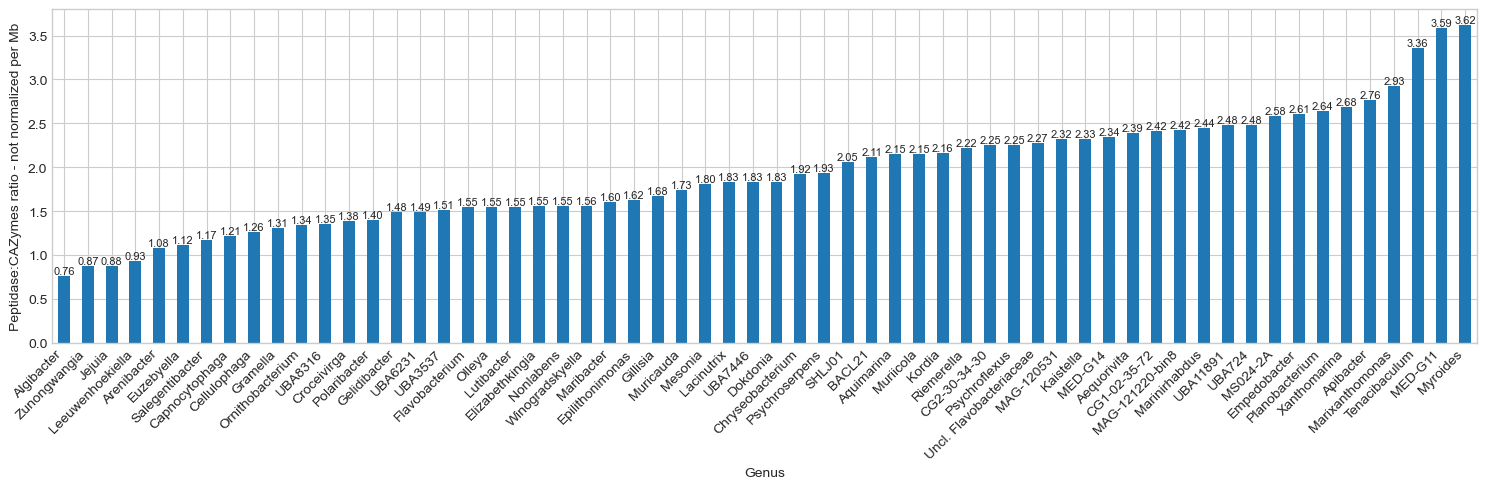

In [8]:
df2 = df1.sort_values(by="PEP:GH")

df2[df2["PEP:GH"]>=1].sort_values(by="PEP:GH", ascending=True).head()

ax = df2["PEP:GH"].plot(kind="bar",figsize=(15,5))

plt.ylabel('Peptidase:CAZymes ratio - not normalized per Mb')
plt.xticks(rotation=45, horizontalalignment='right')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=8) # set the alignment of the text

plt.tight_layout()
plt.show()

#ax.figure.savefig("Ratio.svg", dpi=300)

In [9]:
df1.reset_index().head()

,Genus,Family,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Merops orfs total,Orfs_anno_merops%,scaf_bp,Completeness,merops,PEP:GH,merops_permb,cazymes_permb,P2
0,Aequorivita,Flavobacteriaceae,2958.714286,5003.000000,1139.166667,1827.642857,53.309524,38.569948,61.822365,1.796647,124.642857,4.210442,3.200450e+06,95.061429,124.642857,2.390956,38.918196,16.612573,1.404391
1,Algibacter,Flavobacteriaceae,4080.777778,6760.111111,1593.888889,2521.000000,178.888889,39.321717,62.255655,4.441777,134.888889,3.347715,4.651915e+06,98.622222,134.888889,0.761134,29.010905,38.375071,0.862163
2,Aquimarina,Flavobacteriaceae,4699.179487,7480.384615,1615.974359,2742.461538,109.076923,34.756690,58.658220,2.314977,216.974359,4.591500,5.446682e+06,97.797692,216.974359,2.146611,39.626937,19.937489,1.334296
3,Arenibacter,Flavobacteriaceae,4260.409091,7264.545455,1646.045455,2774.545455,145.636364,38.733654,65.150642,3.392553,151.136364,3.566963,5.102482e+06,98.362727,151.136364,1.078537,29.738942,28.245776,1.028436
4,BACL21,Flavobacteriaceae,2058.000000,3472.533333,863.933333,1340.400000,41.200000,42.815937,65.936525,2.010007,85.266667,4.213801,2.271539e+06,86.130667,85.266667,2.110636,37.902079,18.103018,1.354500


In [10]:
dfx = merge.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).describe()
dfx.columns = [' '.join(col).strip() for col in dfx.columns.values]
dfx.columns = dfx.columns.get_level_values(0)
dfx = dfx.reset_index()
dfx = dfx.sort_values(by=["Family", "Genus"])
dfx = dfx.set_index("Genus")
dfx.head()

,Family,orfs count,orfs mean,orfs std,orfs min,orfs 25%,orfs 50%,orfs 75%,orfs max,pfam count,pfam mean,pfam std,pfam min,pfam 25%,pfam 50%,pfam 75%,pfam max,ko count,ko mean,ko std,ko min,ko 25%,ko 50%,ko 75%,ko max,cog count,cog mean,cog std,cog min,cog 25%,cog 50%,cog 75%,cog max,cazymes count,cazymes mean,cazymes std,cazymes min,cazymes 25%,cazymes 50%,cazymes 75%,cazymes max,Orfs_anno_ko% count,Orfs_anno_ko% mean,Orfs_anno_ko% std,Orfs_anno_ko% min,Orfs_anno_ko% 25%,Orfs_anno_ko% 50%,Orfs_anno_ko% 75%,Orfs_anno_ko% max,Orfs_anno_cog% count,Orfs_anno_cog% mean,Orfs_anno_cog% std,Orfs_anno_cog% min,Orfs_anno_cog% 25%,Orfs_anno_cog% 50%,Orfs_anno_cog% 75%,Orfs_anno_cog% max,Orfs_anno_cazymes% count,Orfs_anno_cazymes% mean,Orfs_anno_cazymes% std,Orfs_anno_cazymes% min,Orfs_anno_cazymes% 25%,Orfs_anno_cazymes% 50%,Orfs_anno_cazymes% 75%,Orfs_anno_cazymes% max,Merops orfs total count,Merops orfs total mean,Merops orfs total std,Merops orfs total min,Merops orfs total 25%,Merops orfs total 50%,Merops orfs total 75%,Merops orfs total max,Orfs_anno_merops% count,Orfs_anno_merops% mean,Orfs_anno_merops% std,Orfs_anno_merops% min,Orfs_anno_merops% 25%,Orfs_anno_merops% 50%,Orfs_anno_merops% 75%,Orfs_anno_merops% max,scaf_bp count,scaf_bp mean,scaf_bp std,scaf_bp min,scaf_bp 25%,scaf_bp 50%,scaf_bp 75%,scaf_bp max,Completeness count,Completeness mean,Completeness std,Completeness min,Completeness 25%,Completeness 50%,Completeness 75%,Completeness max,merops count,merops mean,merops std,merops min,merops 25%,merops 50%,merops 75%,merops max,PEP:GH count,PEP:GH mean,PEP:GH std,PEP:GH min,PEP:GH 25%,PEP:GH 50%,PEP:GH 75%,PEP:GH max,merops_permb count,merops_permb mean,merops_permb std,merops_permb min,merops_permb 25%,merops_permb 50%,merops_permb 75%,merops_permb max,cazymes_permb count,cazymes_permb mean,cazymes_permb std,cazymes_permb min,cazymes_permb 25%,cazymes_permb 50%,cazymes_permb 75%,cazymes_permb max,P2 count,P2 mean,P2 std,P2 min,P2 25%,P2 50%,P2 75%,P2 max
Genus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aequorivita,Flavobacteriaceae,42.0,2958.714286,286.041809,2178.0,2864.50,2997.5,3081.50,3622.0,42.0,5003.000000,583.813493,3268.0,4709.25,5175.0,5296.75,6052.0,42.0,1139.166667,104.868772,842.0,1102.75,1163.0,1195.5,1349.0,42.0,1827.642857,181.142017,1361.0,1763.00,1869.5,1915.75,2262.0,42.0,53.309524,9.549583,20.0,50.25,55.5,58.50,72.0,42.0,38.569948,2.117442,30.903994,37.595241,38.974983,39.744368,43.497758,42.0,61.822365,2.970920,50.210231,60.485832,62.354370,63.569363,67.590705,42.0,1.796647,0.261310,0.801282,1.732871,1.846056,1.962686,2.254933,42.0,124.642857,16.007348,83.0,115.5,126.0,130.75,167.0,42.0,4.210442,0.328778,3.083392,4.071686,4.240784,4.439570,4.711506,42.0,3.200450e+06,3.374418e+05,2300656.0,3081628.25,3193359.0,3327236.0,4042904.0,42.0,95.061429,7.337054,70.29,91.895,98.48,99.240,100.00,42.0,124.642857,16.007348,83.0,115.5,126.0,130.75,167.0,42.0,2.390956,0.381283,1.925926,2.203571,2.287088,2.438595,4.150000,42.0,38.918196,2.542492,29.704551,37.620098,39.384413,40.525472,43.249667,42.0,16.612573,2.397458,7.994864,15.742118,16.964762,18.220938,20.450647,42.0,1.404391,0.053743,1.316456,1.375694,1.391559,1.418358,1.611650
Algibacter,Flavobacteriaceae,9.0,4080.777778,624.058847,3455.0,3849.00,3851.0,3920.00,5561.0,9.0,6760.111111,227.073471,6260.0,6632.00,6838.0,6840.00,6991.0,9.0,1593.888889,148.304117,1416.0,1542.00,1548.0,1591.0,1923.0,9.0,2521.000000,211.792941,2275.0,2442.00,2443.0,2488.00,2998.0,9.0,178.888889,18.751296,139.0,168.00,183.0,192.00,199.0,9.0,39.321717,1.975820,34.580111,39.477727,40.192258,40.218239,40.984081,9.0,62.255655,3.524028,53.911167,63.412101,63.469388,63.568868,65.846599,9.0,4.441777,0.622105,3.290775,4.023155,4.444444,4.988309,5.076531,9.0,134.888889,6.772083,127.0,131.0,131.0,140.00,148.0,9.0,3.347715,0.328416,2.661392,3.401714,3.403481,3.571429,3.675832,9.0,4.651915e+06,1.936653e+05

In [11]:
means = dfx[["cazymes_permb mean","merops_permb mean"]]
means = means.rename(columns={"cazymes_permb mean":"cazymes", "merops_permb mean":"merops"})
means.head()

std = dfx[["cazymes_permb std","merops_permb std"]]
std = std.rename(columns={"cazymes_permb std":"cazymes", "merops_permb std":"merops"})
std.head()

,cazymes,merops
Genus,,
Aequorivita,2.397458,2.542492
Algibacter,2.792471,1.223070
Aquimarina,5.208840,4.856599
Arenibacter,3.948996,2.703904
BACL21,1.994753,2.480800


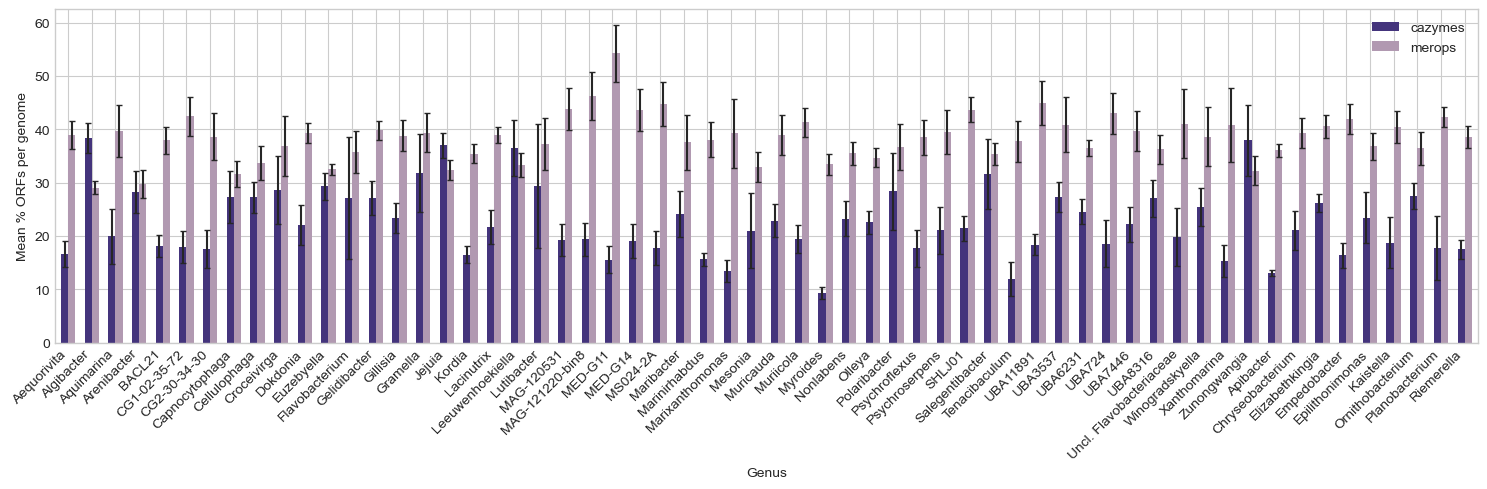

In [12]:
fig, ax = plt.subplots()

means.plot.bar(ax=ax, figsize=(15,5), color=["#44347c","#b199b1"], yerr=std,width=0.6, lw=0.1, capsize=2)

plt.ylabel('Mean % ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()
#ax.figure.savefig("f7_1.svg", dpi=300)

# Supplementary Figures

## Panel A + B 

In [13]:
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

R^2: 0.5505801181341209
Intercept: [-35.43590703]
Slop: [[3.4524908e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


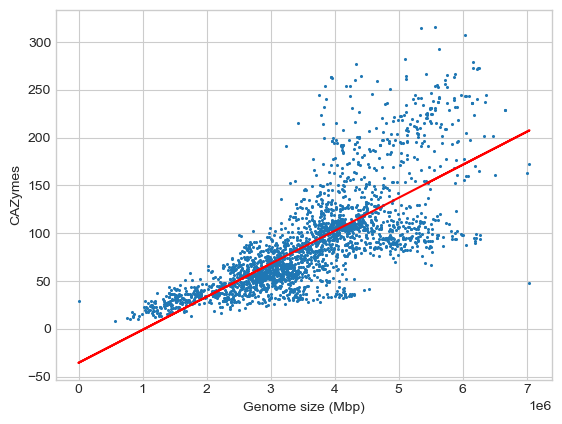

In [14]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y, s=1.5)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Genome size (Mbp)")
plt.ylabel("CAZymes")

#plt.savefig("cazymes_per_Mb.svg", dpi=300)
plt.show()

Pearson's correlation 
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [15]:
from numpy import cov
# calculate covariance matrix
covariance = cov(merge["scaf_bp"],merge["cazymes"])
print(covariance)

[[1.21842497e+12 4.20660100e+07]
 [4.20660100e+07 2.63780888e+03]]


In [38]:
print("Missing values in scaf_bp:", merge["scaf_bp"].isna().sum())
print("Missing values in Merops orfs total:", merge["Merops orfs total"].isna().sum())
print("Missing values in cazymes orfs total:", merge["cazymes"].isna().sum())
print("Infinite values in scaf_bp:", np.isinf(merge["scaf_bp"]).sum())
print("Infinite values in Merops orfs total:", np.isinf(merge["Merops orfs total"]).sum())
print("Infinite values in cazymes orfs total:", np.isinf(merge["cazymes"]).sum())

Missing values in scaf_bp: 0
Missing values in Merops orfs total: 0
Missing values in cazymes orfs total: 0
Infinite values in scaf_bp: 0
Infinite values in Merops orfs total: 0
Infinite values in cazymes orfs total: 0


In [35]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr

print("Merops")
corr, pval = pearsonr(merge["scaf_bp"],merge["Merops orfs total"])
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3e' % np.longdouble(pval))

corr, pval = spearmanr(merge["scaf_bp"], merge["Merops orfs total"])
print('Spearman correlation: %.3f' % corr)
print('p-value: %.3e' % pval)

print("CAZymes")
corr, pval = pearsonr(merge["scaf_bp"], merge["cazymes"])
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3e' % pval)

corr, pval = spearmanr(merge["scaf_bp"], merge["cazymes"])
print('Spearman correlation: %.3f' % corr)
print('p-value: %.3e'% pval)

Merops
Pearsons correlation: 0.902
p-value: 0.000e+00
Spearman correlation: 0.909
p-value: 0.000e+00
CAZymes
Pearsons correlation: 0.742
p-value: 0.000e+00
Spearman correlation: 0.809
p-value: 0.000e+00


R^2: 0.8139675736376801
Intercept: [14.96676456]
Slop: [[3.30922523e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


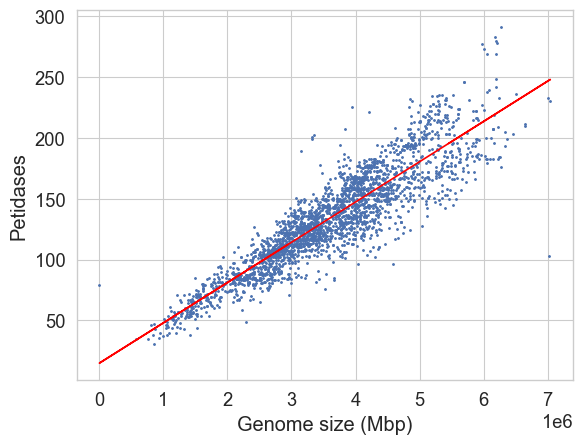

In [ ]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Merops orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())


plt.scatter(X, Y, s=1.5)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Genome size (Mbp)")
plt.ylabel("Petidases")

#plt.savefig("peptidases_per_Mb.svg", dpi=300)
plt.show()

In [ ]:
merge.head()

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,index,Merops orfs total,Orfs_anno_merops%,Assembly accession,Genus,Family,scaf_bp,Completeness,MAG,Origin,merops,PEP:GH,merops_permb,cazymes_permb,P2
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133,GCA_002431085.1,132,4.786077,GCA_002431085.1,Empedobacter,Weeksellaceae,2944839.0,97.85,True,Non_marine,132,2.808511,44.824182,15.960125,1.474860
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036,GCA_002302445.1,83,3.728661,GCA_002302445.1,Capnocytophaga,Flavobacteriaceae,2493828.0,100.00,False,Non_marine,83,1.276923,33.282167,26.064348,1.121622
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614,GCA_014075215.1,102,2.284434,GCA_014075215.1,SCGC-AAA160-P02,Flavobacteriaceae,4308101.0,96.92,True,Marine,102,1.961538,23.676325,12.070283,1.324675
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151,GCA_900186555.1,103,4.489974,GCA_900186555.1,Flavobacterium,Flavobacteriaceae,2572086.0,97.35,False,Unclassified,103,1.839286,40.045317,21.772211,1.295597
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192,GCA_001670625.1,88,4.444444,GCA_001670625.1,Riemerella,Weeksellaceae,2138237.0,100.00,False,Unclassified,88,2.315789,41.155400,17.771650,1.396825


## PANEL C - not normalized

In [ ]:
df_origin = merge.groupby(["Origin"])[["merops","cazymes"]].describe()#.reset_index().sort_values(by=["Family","Genus"])~
df_origin.columns = [' '.join(col).strip() for col in df_origin.columns.values]
df_origin.columns = df_origin.columns.get_level_values(0)
df_origin.head()

,merops count,merops mean,merops std,merops min,merops 25%,merops 50%,merops 75%,merops max,cazymes count,cazymes mean,cazymes std,cazymes min,cazymes 25%,cazymes 50%,cazymes 75%,cazymes max
Origin,,,,,,,,,,,,,,,,
Marine,792.0,119.523990,41.504962,31.0,90.0,122.0,145.0,291.0,792.0,76.088384,46.319506,8.0,40.75,65.0,100.0,266.0
Non_marine,898.0,139.018931,39.039566,40.0,108.0,135.0,169.0,248.0,898.0,89.789532,51.397149,13.0,55.00,83.0,107.0,307.0
Unclassified,990.0,139.371717,38.215254,38.0,109.0,137.0,165.0,269.0,990.0,96.212121,53.371577,19.0,56.00,88.5,112.0,316.0


In [ ]:
a = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops mean","cazymes mean"])
a["id"] = a["Origin"] +"_"+a["variable"].str.replace(" mean","")
a=a[["id","value"]]
a= a.rename(columns={"value":"mean"})

b = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops std","cazymes std"])
b["id"] = b["Origin"] +"_"+b["variable"].str.replace(" std","")
b=b[["id","value"]]
b= b.rename(columns={"value":"std"})
merge_ab = pd.merge(a,b, how="left", left_on="id", right_on="id")

c = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops max","cazymes max"])
c["id"] = c["Origin"] +"_"+c["variable"].str.replace(" max","")
c=c[["id","value"]]
c= c.rename(columns={"value":"max"})
merge_ab = pd.merge(merge_ab,c, how="left", left_on="id", right_on="id")

d = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops min","cazymes min"])
d["id"] = d["Origin"] +"_"+d["variable"].str.replace(" min","")
d=d[["id","value"]]
d= d.rename(columns={"value":"min"})
merge_ab = pd.merge(merge_ab,d, how="left", left_on="id", right_on="id")


e = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops 50%","cazymes 50%"])
e["id"] = e["Origin"] +"_"+e["variable"].str.replace(" 50%","")
e=e[["id","value"]]
e= e.rename(columns={"value":"median"})
merge_ab = pd.merge(merge_ab,e, how="left", left_on="id", right_on="id")


merge_ab.head(10)

,id,mean,std,max,min,median
0,Marine_merops,119.523990,41.504962,291.0,31.0,122.0
1,Non_marine_merops,139.018931,39.039566,248.0,40.0,135.0
2,Unclassified_merops,139.371717,38.215254,269.0,38.0,137.0
3,Marine_cazymes,76.088384,46.319506,266.0,8.0,65.0
4,Non_marine_cazymes,89.789532,51.397149,307.0,13.0,83.0
5,Unclassified_cazymes,96.212121,53.371577,316.0,19.0,88.5


<Figure size 1000x300 with 0 Axes>

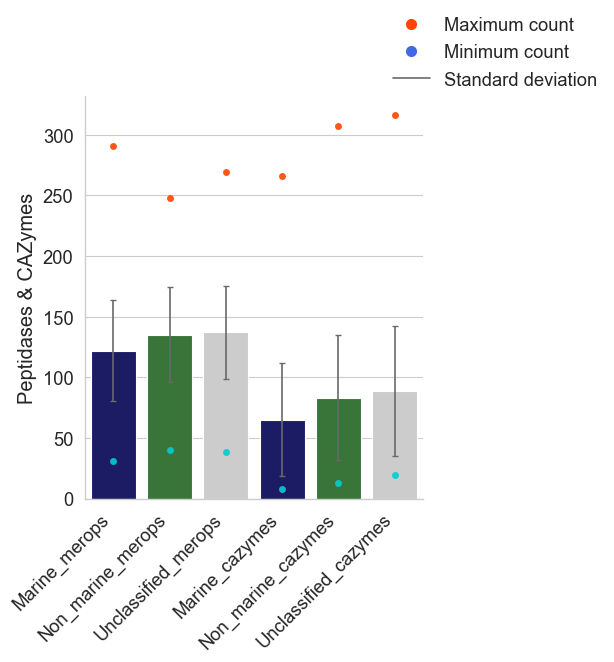

In [ ]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

plt.figure(figsize=(10,3))

my_colors=["#101070","#2f7e2f","#cbcccb"]


g = sns.catplot(
    data=merge_ab, kind="bar",  palette=my_colors,
    x='id', dodge=False, legend_out=True, 
    y='median', #xerr="std",
    height=5, # make the plot 7 units high
    aspect=1) # height is n times width

#g._legend.set_bbox_to_anchor((0.12, 0.92))

g.map(plt.errorbar, "id", "median", "std", ls='none', capsize=2, color="dimgrey")

#g.map(plt.scatter(x="Genus",y="Nr_BGCs_max"))

sns.stripplot(x='id',y='max', data=merge_ab, jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='id',y='min', data=merge_ab, jitter=False, color="darkturquoise", alpha=0.9)

plt.xlabel('') #, fontsize=15
plt.ylabel('Peptidases & CAZymes')#fontsize=13

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='orangered', marker='o', ls="",
                          markersize=7, label='Maximum count')
blue_line = mlines.Line2D([], [], color='royalblue', marker='o',ls="",
                          markersize=7, label='Minimum count')
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[red_line,blue_line, black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
#g.savefig("perMb.svg")

## PANEL D Per genome size

In [ ]:
df_origin = merge.groupby(["Origin"])[["merops_permb","cazymes_permb"]].describe()#.reset_index().sort_values(by=["Family","Genus"])~
df_origin.columns = [' '.join(col).strip() for col in df_origin.columns.values]
df_origin.columns = df_origin.columns.get_level_values(0)
df_origin.head()

,merops_permb count,merops_permb mean,merops_permb std,merops_permb min,merops_permb 25%,merops_permb 50%,merops_permb 75%,merops_permb max,cazymes_permb count,cazymes_permb mean,cazymes_permb std,cazymes_permb min,cazymes_permb 25%,cazymes_permb 50%,cazymes_permb 75%,cazymes_permb max
Origin,,,,,,,,,,,,,,,,
Marine,792.0,38.662700,5.853249,14.657982,34.434409,38.752598,42.427970,61.461520,792.0,22.851930,7.803069,6.830904,17.503043,21.705297,26.888539,53.672696
Non_marine,898.0,37.373311,4.239311,23.756296,34.438274,37.851647,40.496700,54.037573,898.0,23.192586,9.026778,7.433160,17.851612,21.084843,26.418991,66.745746
Unclassified,990.0,37.363969,4.485784,21.422985,34.471780,37.768185,40.336789,60.245096,990.0,24.615186,9.073358,7.820797,18.947386,23.254680,27.700309,66.181153


In [ ]:
a = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_permb mean","cazymes_permb mean"])
a["id"] = a["Origin"] +"_"+a["variable"].str.replace("_permb mean","")
a=a[["id","value"]]
a= a.rename(columns={"value":"mean"})

b = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_permb std","cazymes_permb std"])
b["id"] = b["Origin"] +"_"+b["variable"].str.replace("_permb std","")
b=b[["id","value"]]
b= b.rename(columns={"value":"std"})
merge_ab = pd.merge(a,b, how="left", left_on="id", right_on="id")

c = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_permb max","cazymes_permb max"])
c["id"] = c["Origin"] +"_"+c["variable"].str.replace("_permb max","")
c=c[["id","value"]]
c= c.rename(columns={"value":"max"})
merge_ab = pd.merge(merge_ab,c, how="left", left_on="id", right_on="id")

d = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_permb min","cazymes_permb min"])
d["id"] = d["Origin"] +"_"+d["variable"].str.replace("_permb min","")
d=d[["id","value"]]
d= d.rename(columns={"value":"min"})
merge_ab = pd.merge(merge_ab,d, how="left", left_on="id", right_on="id")


e = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_permb 50%","cazymes_permb 50%"])
e["id"] = e["Origin"] +"_"+e["variable"].str.replace("_permb 50%","")
e=e[["id","value"]]
e= e.rename(columns={"value":"median"})
merge_ab = pd.merge(merge_ab,e, how="left", left_on="id", right_on="id")


merge_ab.head(10)

,id,mean,std,max,min,median
0,Marine_merops,38.662700,5.853249,61.461520,14.657982,38.752598
1,Non_marine_merops,37.373311,4.239311,54.037573,23.756296,37.851647
2,Unclassified_merops,37.363969,4.485784,60.245096,21.422985,37.768185
3,Marine_cazymes,22.851930,7.803069,53.672696,6.830904,21.705297
4,Non_marine_cazymes,23.192586,9.026778,66.745746,7.433160,21.084843
5,Unclassified_cazymes,24.615186,9.073358,66.181153,7.820797,23.254680


<Figure size 1000x300 with 0 Axes>

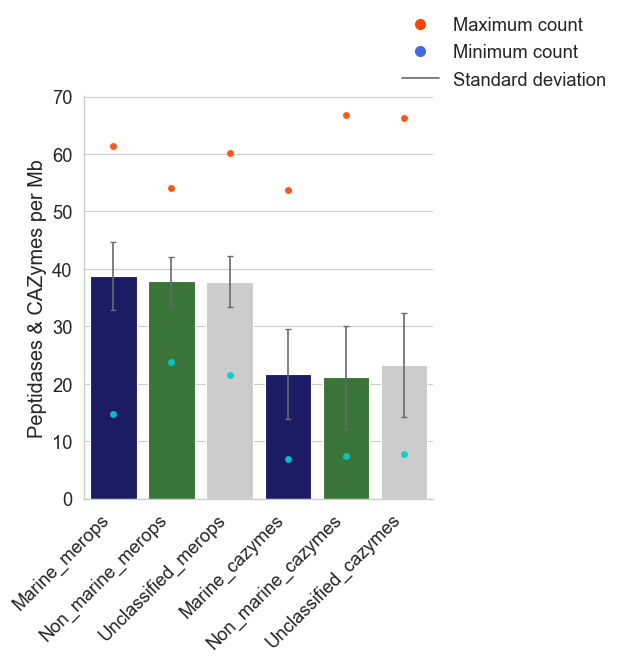

In [ ]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

plt.figure(figsize=(10,3))

my_colors=["#101070","#2f7e2f","#cbcccb"]


g = sns.catplot(
    data=merge_ab, kind="bar",  palette=my_colors,
    x='id', dodge=False, legend_out=True, 
    y='median', #xerr="std",
    height=5, # make the plot 7 units high
    aspect=1) # height is n times width

#g._legend.set_bbox_to_anchor((0.12, 0.92))

g.map(plt.errorbar, "id", "median", "std", ls='none', capsize=2, color="dimgrey")

#g.map(plt.scatter(x="Genus",y="Nr_BGCs_max"))

sns.stripplot(x='id',y='max', data=merge_ab, jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='id',y='min', data=merge_ab, jitter=False, color="darkturquoise", alpha=0.9)

plt.xlabel('') #, fontsize=15
plt.ylabel('Peptidases & CAZymes per Mb')#fontsize=13

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='orangered', marker='o', ls="",
                          markersize=7, label='Maximum count')
blue_line = mlines.Line2D([], [], color='royalblue', marker='o',ls="",
                          markersize=7, label='Minimum count')
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[red_line,blue_line, black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
#g.savefig("perMb.svg")

## PANEL E - Ratio

In [ ]:
merge.head()

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,index,Merops orfs total,Orfs_anno_merops%,Assembly accession,Genus,Family,scaf_bp,Completeness,MAG,Origin,merops,PEP:GH,merops_permb,cazymes_permb,P2
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133,GCA_002431085.1,132,4.786077,GCA_002431085.1,Empedobacter,Weeksellaceae,2944839.0,97.85,True,Non_marine,132,2.808511,44.824182,15.960125,1.474860
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036,GCA_002302445.1,83,3.728661,GCA_002302445.1,Capnocytophaga,Flavobacteriaceae,2493828.0,100.00,False,Non_marine,83,1.276923,33.282167,26.064348,1.121622
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614,GCA_014075215.1,102,2.284434,GCA_014075215.1,SCGC-AAA160-P02,Flavobacteriaceae,4308101.0,96.92,True,Marine,102,1.961538,23.676325,12.070283,1.324675
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151,GCA_900186555.1,103,4.489974,GCA_900186555.1,Flavobacterium,Flavobacteriaceae,2572086.0,97.35,False,Unclassified,103,1.839286,40.045317,21.772211,1.295597
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192,GCA_001670625.1,88,4.444444,GCA_001670625.1,Riemerella,Weeksellaceae,2138237.0,100.00,False,Unclassified,88,2.315789,41.155400,17.771650,1.396825


In [ ]:
df_origin = merge.groupby(["Origin"])[["PEP:GH"]].describe()#.reset_index().sort_values(by=["Family","Genus"])~
df_origin.columns = [' '.join(col).strip() for col in df_origin.columns.values]
df_origin.columns = df_origin.columns.get_level_values(0)
df_origin.head()

,PEP:GH count,PEP:GH mean,PEP:GH std,PEP:GH min,PEP:GH 25%,PEP:GH 50%,PEP:GH 75%,PEP:GH max
Origin,,,,,,,,
Marine,792.0,1.918875,0.761160,0.390244,1.371589,1.855247,2.354514,4.727273
Non_marine,898.0,1.858021,0.721262,0.409449,1.430189,1.851321,2.195520,4.928571
Unclassified,990.0,1.740238,0.700906,0.390698,1.328799,1.668561,2.056690,4.828571


In [ ]:
a = df_origin.reset_index().melt(id_vars="Origin",value_vars=["PEP:GH mean"])
a["id"] = a["Origin"] +"_"+a["variable"].str.replace("mean","")
a=a[["id","value"]]
a= a.rename(columns={"value":"mean"})

b = df_origin.reset_index().melt(id_vars="Origin",value_vars=["PEP:GH std"])
b["id"] = b["Origin"] +"_"+b["variable"].str.replace("std","")
b=b[["id","value"]]
b= b.rename(columns={"value":"std"})
merge_ab = pd.merge(a,b, how="left", left_on="id", right_on="id")

c = df_origin.reset_index().melt(id_vars="Origin",value_vars=["PEP:GH max"])
c["id"] = c["Origin"] +"_"+c["variable"].str.replace("max","")
c=c[["id","value"]]
c= c.rename(columns={"value":"max"})
merge_ab = pd.merge(merge_ab,c, how="left", left_on="id", right_on="id")

d = df_origin.reset_index().melt(id_vars="Origin",value_vars=["PEP:GH min"])
d["id"] = d["Origin"] +"_"+d["variable"].str.replace("min","")
d=d[["id","value"]]
d= d.rename(columns={"value":"min"})
merge_ab = pd.merge(merge_ab,d, how="left", left_on="id", right_on="id")


e = df_origin.reset_index().melt(id_vars="Origin",value_vars=["PEP:GH 50%"])
e["id"] = e["Origin"] +"_"+e["variable"].str.replace("50%","")
e=e[["id","value"]]
e= e.rename(columns={"value":"median"})
merge_ab = pd.merge(merge_ab,e, how="left", left_on="id", right_on="id")


merge_ab.head(10)

,id,mean,std,max,min,median
0,Marine_PEP:GH,1.918875,0.761160,4.727273,0.390244,1.855247
1,Non_marine_PEP:GH,1.858021,0.721262,4.928571,0.409449,1.851321
2,Unclassified_PEP:GH,1.740238,0.700906,4.828571,0.390698,1.668561


<Figure size 1000x300 with 0 Axes>

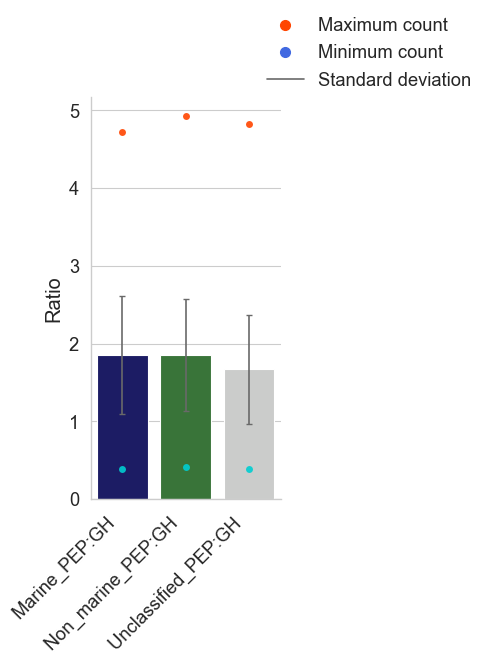

In [ ]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

plt.figure(figsize=(10,3))

my_colors=["#101070","#2f7e2f","#cbcccb"]


g = sns.catplot(
    data=merge_ab, kind="bar",  palette=my_colors,
    x='id', dodge=False, legend_out=True, 
    y='median', #xerr="std",
    height=5, # make the plot 7 units high
    aspect=0.7) # height is n times width

#g._legend.set_bbox_to_anchor((0.12, 0.92))

g.map(plt.errorbar, "id", "median", "std", ls='none', capsize=2, color="dimgrey")

#g.map(plt.scatter(x="Genus",y="Nr_BGCs_max"))

sns.stripplot(x='id',y='max', data=merge_ab, jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='id',y='min', data=merge_ab, jitter=False, color="darkturquoise", alpha=0.9)

plt.xlabel('') #, fontsize=15
plt.ylabel('Ratio')#fontsize=13

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='orangered', marker='o', ls="",
                          markersize=7, label='Maximum count')
blue_line = mlines.Line2D([], [], color='royalblue', marker='o',ls="",
                          markersize=7, label='Minimum count')
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[red_line,blue_line, black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
g.savefig("ratio.svg")